## 가설 4. 고객 가구의 자녀 수나 청소년 수가 높을 수록 불만 사항을 제기한 경우가 비례할 것이다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
original = pd.read_csv('./marketing_campaign.csv', sep='\t')
original

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df = original.loc[:, ['Kidhome', 'Teenhome', 'Complain']]
df

,Kidhome,Teenhome,Complain
0,0,0,0
1,1,1,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2235,0,1,0
2236,2,1,0
2237,0,0,0
2238,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Kidhome   2240 non-null   int64
 1   Teenhome  2240 non-null   int64
 2   Complain  2240 non-null   int64
dtypes: int64(3)
memory usage: 52.6 KB


In [5]:
df.describe()

,Kidhome,Teenhome,Complain
count,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,0.009375
std,0.538398,0.544538,0.096391
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,2.000000,2.000000,1.000000


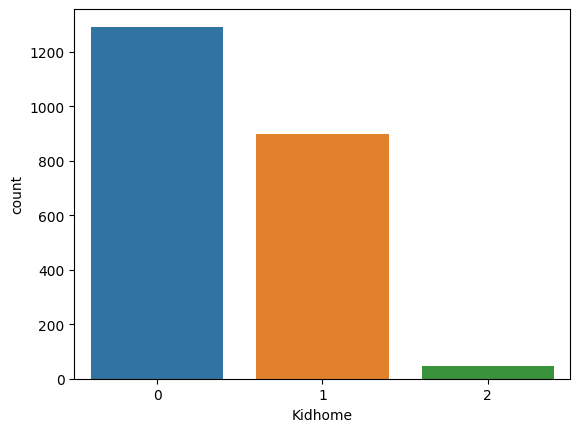

In [28]:
sns.countplot(data=df, x='Kidhome')
plt.show()

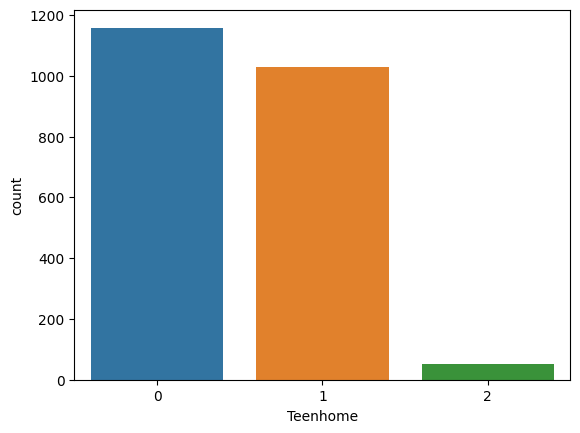

In [6]:
sns.countplot(data=df, x='Teenhome')
plt.show()

In [5]:
df.corr()

,Kidhome,Teenhome,Complain
Kidhome,1.000000,-0.036133,0.040207
Teenhome,-0.036133,1.000000,0.003138
Complain,0.040207,0.003138,1.000000


### 자녀 수에 따른 불만사항 제기 비율

In [6]:
# 자녀 수에 따른 컴플레인 비율

(df.groupby('Kidhome')[['Complain']].mean() * 100).reset_index()

,Kidhome,Complain
0,0,0.618716
1,1,1.334816
2,2,2.083333


In [7]:
# 청소년 수에 따른 컴플레인 비율

(df.groupby('Teenhome')[['Complain']].mean() * 100).reset_index()

,Teenhome,Complain
0,0,0.949914
1,1,0.873786
2,2,1.923077


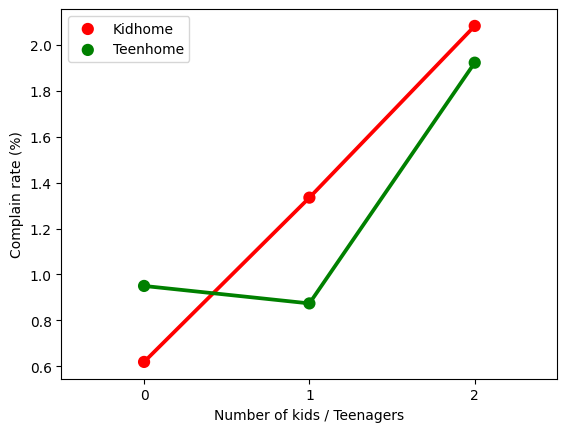

In [8]:
# 시각화

sns.pointplot(data=(df.groupby('Kidhome')[['Complain']].mean() * 100).reset_index(), x='Kidhome', y='Complain', color='red', label='Kidhome')
sns.pointplot(data=(df.groupby('Teenhome')[['Complain']].mean() * 100).reset_index(), x='Teenhome', y='Complain', color='green', label='Teenhome')
plt.xlabel('Number of kids / Teenagers')
plt.ylabel('Complain rate (%)')
plt.legend()
plt.show()

### 자녀 수 외, 자녀의 존재 여부에 따른 불만제기 비율 분석

In [9]:
df['Kid_yn'] = df.Kidhome.apply(lambda x: 1 if x >= 1 else 0)
df['Teen_yn'] = df.Teenhome.apply(lambda x: 1 if x >= 1 else 0)
df

,Kidhome,Teenhome,Complain,Kid_yn,Teen_yn
0,0,0,0,0,0
1,1,1,0,1,1
2,0,0,0,0,0
3,1,0,0,1,0
4,1,0,0,1,0
...,...,...,...,...,...
2235,0,1,0,0,1
2236,2,1,0,1,1
2237,0,0,0,0,0
2238,0,1,0,0,1


In [10]:
df.corr()

,Kidhome,Teenhome,Complain,Kid_yn,Teen_yn
Kidhome,1.000000,-0.036133,0.040207,0.964257,-0.037543
Teenhome,-0.036133,1.000000,0.003138,-0.050494,0.961998
Complain,0.040207,0.003138,1.000000,0.038653,-0.001333
Kid_yn,0.964257,-0.050494,0.038653,1.000000,-0.055040
Teen_yn,-0.037543,0.961998,-0.001333,-0.055040,1.000000


In [11]:
# 자녀 존재 여부에 따른 컴플레인 비율

(df.groupby('Kid_yn')[['Complain']].mean() * 100).reset_index()

,Kid_yn,Complain
0,0,0.618716
1,1,1.372756


In [12]:
# 청소년 존재 여부 따른 컴플레인 비율

(df.groupby('Teen_yn')[['Complain']].mean() * 100).reset_index()

,Teen_yn,Complain
0,0,0.949914
1,1,0.924214


In [13]:
# 시각화 위한 처리

tmp = pd.merge(left=(df.groupby('Kid_yn')[['Complain']].mean() * 100).reset_index(),
               right=(df.groupby('Teen_yn')[['Complain']].mean() * 100).reset_index(),
               left_on='Kid_yn', right_on='Teen_yn', suffixes=['_kid', '_teen'])
tmp.drop('Teen_yn', axis=1, inplace=True)
tmp.rename(columns={'Kid_yn':'Child_yn'}, inplace=True)
tmp = tmp.melt(id_vars='Child_yn')
tmp

,Child_yn,variable,value
0,0,Complain_kid,0.618716
1,1,Complain_kid,1.372756
2,0,Complain_teen,0.949914
3,1,Complain_teen,0.924214


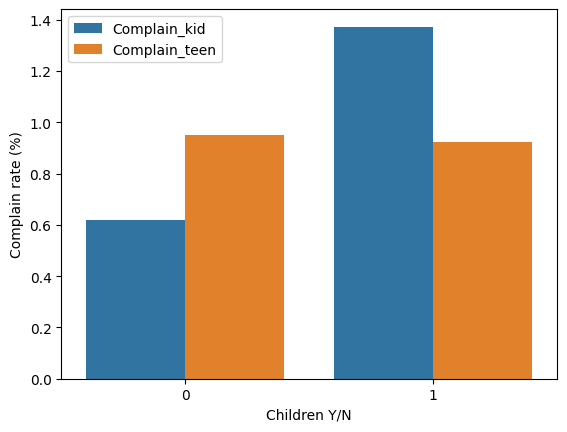

In [14]:
# 시각화

sns.barplot(data=tmp, x='Child_yn', y='value', hue='variable')
plt.xlabel('Children Y/N')
plt.ylabel('Complain rate (%)')
plt.legend()
plt.show()

## 결론
1. 자녀 수 혹은 자녀 존재 여부와 컴플레인 비율은 정비례한다
2. 청소년 수는 많을 수록 컴플레인 비율이 증가하는 경향이 보일 가능성이 있으나, 청소년 수 표본의 종류가(3 이상의 표본 필요) 부족해 증명 불가
3. 청소년 존재 여부와 컴플레인 비율은 관계가 없음